### Download Libaray

In [317]:
# Watermark: IPython magic extension for printing date and time stamps, version numbers, and hardware information
!pip install -q -U watermark
# Transformer: State-of-the-art Natural Language Processing for PyTorch and TensorFlow 2.0
# !pip install transformers==2.11.0

# Print out key libraries' versions 
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

# columnize: Format a simple (i.e., not nested) list into aligned columns
# !pip install columnize


CPython 3.7.7
IPython 7.16.1

numpy 1.19.1
pandas 1.0.5
torch 1.6.0
transformers 2.11.0


In [75]:
# Keras is an open-source library that provides a Python interface for artificial neural networks.
# Keras acts as an interface for the TensorFlow library.
!pip install keras
!pip install tensorflow

     |████████████████████████████████| 165.1 MB 12 kB/s  eta 0:00:01    |██                              | 10.8 MB 2.4 MB/s eta 0:01:06     |███▍                            | 17.7 MB 2.6 MB/s eta 0:00:57     |█████▊                          | 29.6 MB 1.2 MB/s eta 0:01:52MB/s eta 0:01:57     |██████▊                         | 35.0 MB 2.2 MB/s eta 0:01:01     |██████▉                         | 35.2 MB 2.2 MB/s eta 0:01:01     |██████▉                         | 35.4 MB 2.2 MB/s eta 0:01:00     |████████▏                       | 41.9 MB 2.5 MB/s eta 0:00:49     |████████▎                       | 42.7 MB 619 kB/s eta 0:03:18     |█████████                       | 46.9 MB 1.3 MB/s eta 0:01:33     |█████████▉                      | 50.6 MB 2.2 MB/s eta 0:00:53     |█████████▉                      | 50.8 MB 2.2 MB/s eta 0:00:53     |███████████                     | 57.3 MB 1.8 MB/s eta 0:00:59     |███████████▋                    | 60.0 MB 2.0 MB/s eta 0:00:53     |███████████▉              

     |████████████████████████████████| 77 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 3.7 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=192cc2d7de54d20f6fe885169b187edd54e02cbdfe43dda0834c86d0384b3f17
  Stored in directory: /Users/han/Library/Caches/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1


### Import Library

In [334]:
import os
# util library
import ast
import emoji 
import random

# ML/NLP/NLU library
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Data Analytics library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

# Visualization library
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

### Common Setup

In [319]:
# Visualization Config 
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 10

# PyTorch Config 
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)

# Pandas Config
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [320]:
DATA_DIR = './data'
print(os.listdir(DATA_DIR))

['tweet_emoji_dev_10000.csv', 'tweet_emoji_train_200000.csv', '.DS_Store', 'dev.txt', 'train.txt', 'glove.6B.50d.txt', 'dev.txt.zip', 'train.txt.zip', 'test.txt.zip', 'test.txt']


### Exploratory Data Analysis

In [363]:
df = pd.read_csv(os.path.join(DATA_DIR, 'tweet_emoji_train_200000.csv'))
# df = df.head(10000)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   tweet   10000 non-null  object
 2   emoji   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


,id,tweet,emoji
0,0,CeeC is going to be another Tboss What is 45 million Naira,['face_with_tears_of_joy']
1,1,This gif kills me Death is literally gushing towards you and you really gon do a whole 3point turn,['weary_face']
2,2,LOVE TEST Raw Real JaDine,['purple_heart']
3,3,i swear we dont gotta look it finds us,['face_with_tears_of_joy']
4,4,We would like to wish everyone a very Happy New Year and all the best in 2018,['party_popper']


In [364]:
# Drop id column
df = df.drop('id', 1) 
# Drop duplicated tweet (for example: thank you)
df = df.drop_duplicates(subset=['tweet'], keep=False) 
df.info()
# Drop any sample with null attribute
df = df.dropna(how='any',axis=0)  
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9402 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   9402 non-null   object
 1   emoji   9402 non-null   object
dtypes: object(2)
memory usage: 220.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9402 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   9402 non-null   object
 1   emoji   9402 non-null   object
dtypes: object(2)
memory usage: 220.4+ KB


,tweet,emoji
0,CeeC is going to be another Tboss What is 45 million Naira,['face_with_tears_of_joy']
2,LOVE TEST Raw Real JaDine,['purple_heart']
4,We would like to wish everyone a very Happy New Year and all the best in 2018,['party_popper']
5,15000 retweets a new song song off Swaecation part 2 of unforgettable go,['speaking_head']
6,just know ilysm k bye friend,['purple_heart']


In [365]:
# Convert column "emoji" to "set", so duplicated emoji will be removed 
df['emoji'] = df['emoji'].apply(lambda x: set(ast.literal_eval(x))) 
# Then convert column "emoji" to "list", so it is hashable 
df.emoji= df.emoji.apply(list)
# Peek the head and see if dataframe transformation is working as expected 
df.head(10)

,tweet,emoji
0,CeeC is going to be another Tboss What is 45 million Naira,[face_with_tears_of_joy]
2,LOVE TEST Raw Real JaDine,[purple_heart]
4,We would like to wish everyone a very Happy New Year and all the best in 2018,[party_popper]
5,15000 retweets a new song song off Swaecation part 2 of unforgettable go,[speaking_head]
6,just know ilysm k bye friend,[purple_heart]
7,Too glam to give a damn,[sparkles]
8,fuck that sicko,[clapping_hands]
9,Can I marry someone who understands all these memes,[loudly_crying_face]
12,theyre 14 so i mean,"[person_shrugging, female_sign]"
13,Your artist got a dope sound my boy runs DM them this song for a post,[fire]


In [366]:
# helper functions to get the distinct emoji in the dataset
def get_distinct_emoji(emoji_column:pd.core.series.Series)->set:
    emoji_set = set()
    for emojis in emoji_column:
        for x in emojis: 
            emoji_set.add(x)
    return emoji_set

def format_emoji(e):
    return emoji.emojize(':'+ e +':')

def print_distinct_emoji_in_dataset(emoji_set:list, displaywidth=10):
    print('Total distinct count of Emojis in dataset is : {}'.format(len(emoji_set)))
    emoji_set_formatted = [format_emoji(e) for e in emoji_set]
    display = ''
    for i, e in enumerate(emoji_set_formatted):
        display += e + ' '
        if (i + 1) % displaywidth == 0:
            display = display + '\n'
    print(display)

# Gets the distinct emoji from dataset to be used for building the emoji multiclass classifier 
emoji_class = get_distinct_emoji(df.emoji)
print_distinct_emoji_in_dataset(sorted(list(emoji_class)))

Total distinct count of Emojis in dataset is : 49
👌 👇 👉 😁 💙 👏 💥 😢 ‼ 👀 
😘 🙄 😂 ♀ 🔥 💪 😳 🙏 🌟 ♥ 
✔ 💯 😭 ♂ 🎉 🤦 🤷 🚨 💜 🙌 
❤ ➡ 🤣 💀 ☺ 😍 😊 😎 ✨ 💖 
🗣 🤔 👍 🏆 💕 😩 ✅ 😉 💛 


In [367]:
# Since most of the tweets in the dataset only contain one emoji, we will build a multiclass classifier
# instead of building a multilable classifier 

# So, we will build a multiclass dataset with tweets which only contain one emoji 
df_multiclass_dataset = df[df['emoji'].apply(lambda x: len(x)==1)].copy()
# Create a column "label", to save the emoji info for each tweet in the dataset
df_multiclass_dataset['label'] = df_multiclass_dataset['emoji'].apply(lambda x: x[0])
df_multiclass_dataset.head()
df_multiclass_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8244 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   8244 non-null   object
 1   emoji   8244 non-null   object
 2   label   8244 non-null   object
dtypes: object(3)
memory usage: 257.6+ KB


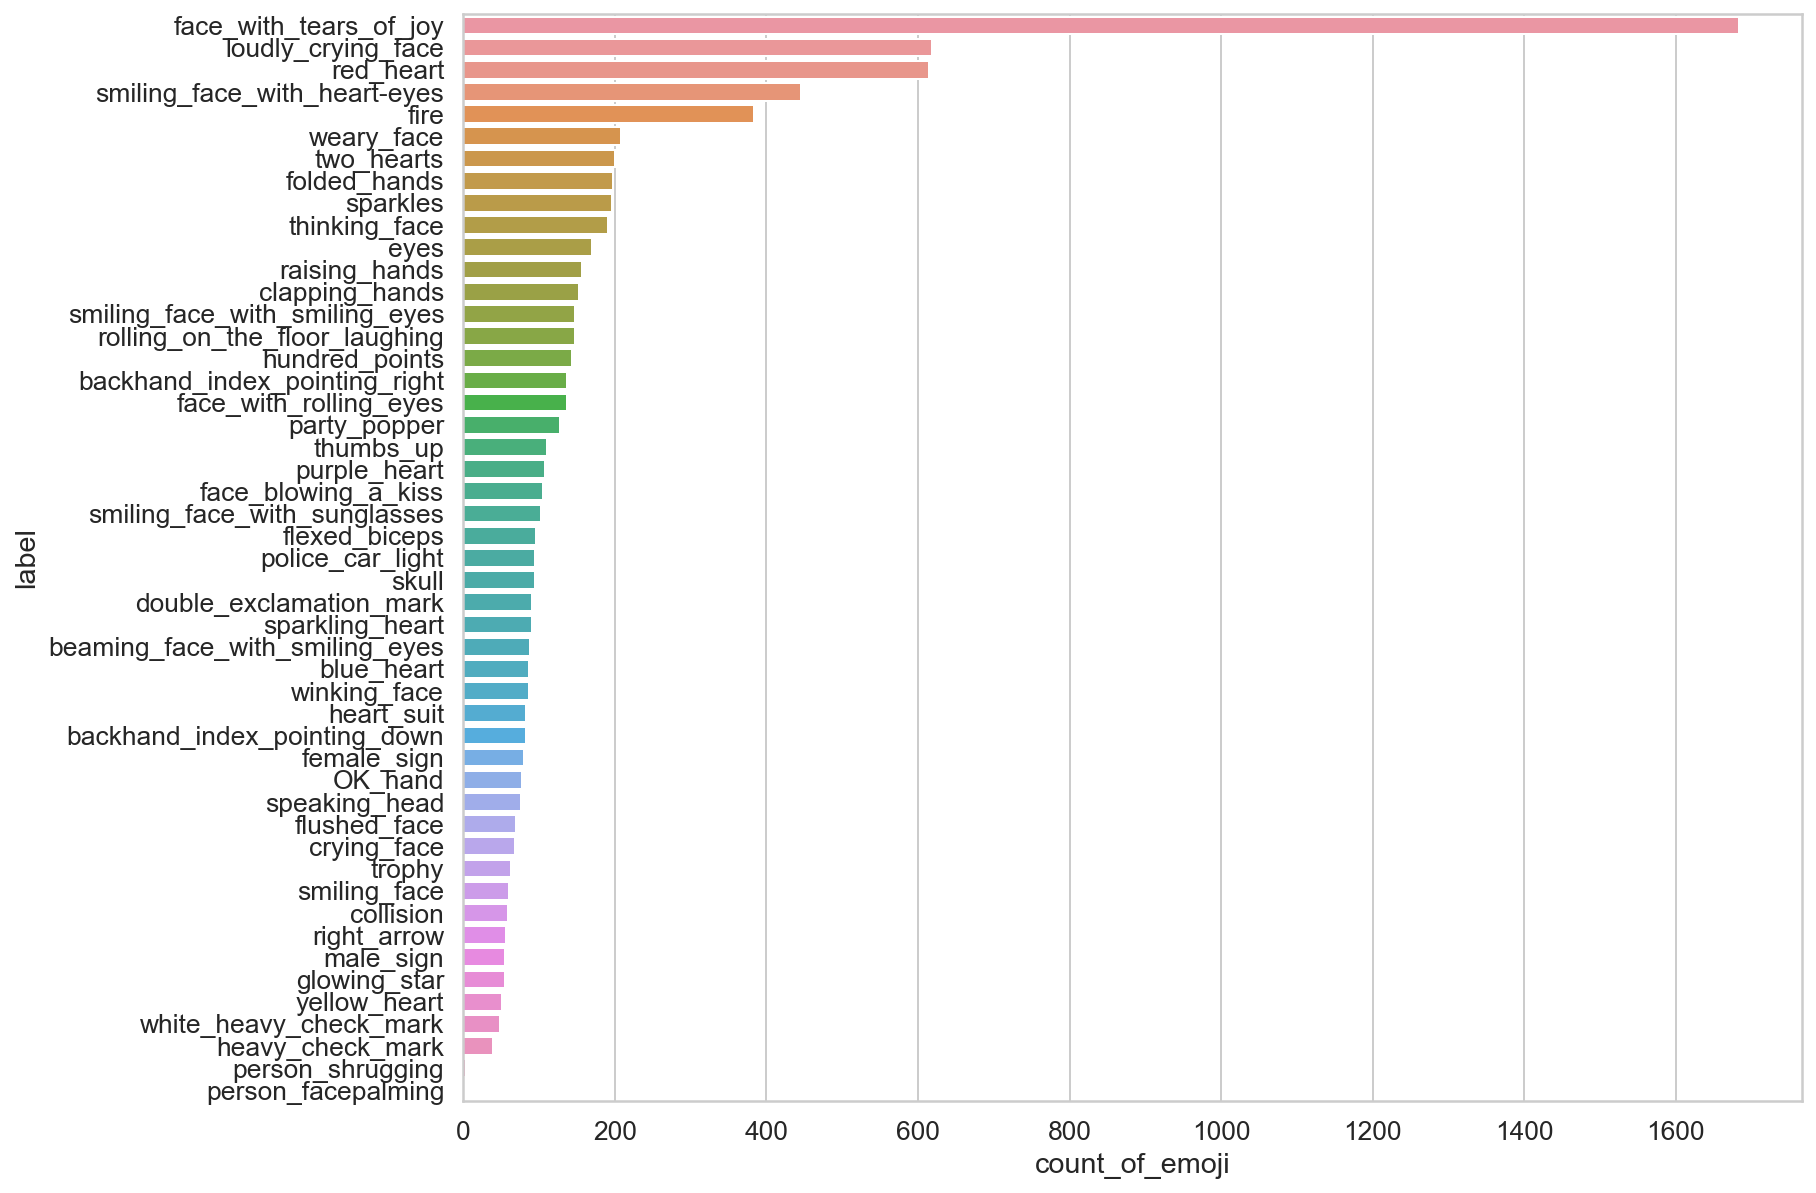

In [368]:
# Print out the count of each class (e.g., each emoji) in the dataset
order = df_multiclass_dataset['label'].value_counts(ascending=False).index
sns.countplot(y="label", data=df_multiclass_dataset, order=order)
plt.xlabel('count_of_emoji');

In [369]:
df_multiclass_dataset['label'].unique()

array(['face_with_tears_of_joy', 'purple_heart', 'party_popper',
       'speaking_head', 'sparkles', 'clapping_hands',
       'loudly_crying_face', 'fire', 'hundred_points', 'red_heart',
       'raising_hands', 'smiling_face_with_heart-eyes', 'trophy',
       'weary_face', 'beaming_face_with_smiling_eyes',
       'backhand_index_pointing_down', 'two_hearts', 'heart_suit',
       'male_sign', 'thumbs_up', 'folded_hands', 'flexed_biceps',
       'face_blowing_a_kiss', 'smiling_face', 'face_with_rolling_eyes',
       'crying_face', 'police_car_light', 'OK_hand', 'blue_heart',
       'winking_face', 'flushed_face', 'white_heavy_check_mark',
       'female_sign', 'smiling_face_with_sunglasses',
       'double_exclamation_mark', 'smiling_face_with_smiling_eyes',
       'thinking_face', 'backhand_index_pointing_right', 'collision',
       'rolling_on_the_floor_laughing', 'yellow_heart', 'skull', 'eyes',
       'right_arrow', 'sparkling_heart', 'glowing_star',
       'heavy_check_mark', 'perso

In [370]:
emoji_class = ['face_with_tears_of_joy',
               'red_heart',
               'loudly_crying_face',
               'smiling_face_with_heart-eyes', 
               'fire', 
               'weary_face', 
               'thinking_face', 
               'folded_hands', 
               'two_hearts', 
               'smiling_face_with_smiling_eyes',
               'sparkles', 
               'raising_hands', 
               'eyes', 
               'face_with_rolling_eyes',
               'hundred_points', 
#                'rolling_on_the_floor_laughing',
               'clapping_hands', 
#                'thumbs_up', 
#                'face_blowing_a_kiss', 
#                'party_popper',
              ]
print_distinct_emoji_in_dataset(emoji_class)
df_multiclass_dataset = df_multiclass_dataset[df_multiclass_dataset['label'].isin(emoji_class)]

# Samples equal size of each class with sample size as the size of the class with minimum number of data.
g = df_multiclass_dataset.groupby('label', as_index = False, group_keys=False)
df_multiclass_dataset_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
print(df_multiclass_dataset_balanced['label'].value_counts())

Total distinct count of Emojis in dataset is : 16
😂 ❤ 😭 😍 🔥 😩 🤔 🙏 💕 😊 
✨ 🙌 👀 🙄 💯 👏 
fire                              137
two_hearts                        137
face_with_tears_of_joy            137
hundred_points                    137
smiling_face_with_heart-eyes      137
clapping_hands                    137
thinking_face                     137
folded_hands                      137
sparkles                          137
weary_face                        137
smiling_face_with_smiling_eyes    137
raising_hands                     137
loudly_crying_face                137
face_with_rolling_eyes            137
red_heart                         137
eyes                              137
Name: label, dtype: int64


### Generate Text Embeddings and Label Categorical

#### Label Categorical

In [371]:
label_encoder = preprocessing.LabelEncoder()
df_multiclass_dataset_balanced['target'] = label_encoder.fit_transform(df_multiclass_dataset_balanced['label'])
df_multiclass_dataset_balanced.reset_index(inplace=True) # reset the index 
# rename the index to use name "id"
df_multiclass_dataset_balanced.index.rename('id', inplace=True) 
# drop the redundant index column and only use the "id" column
df_multiclass_dataset_balanced = df_multiclass_dataset_balanced.drop('index', 1)

emoji_class = list(label_encoder.classes_)

In [372]:
print(emoji_class)
df_multiclass_dataset_balanced.head()

['clapping_hands', 'eyes', 'face_with_rolling_eyes', 'face_with_tears_of_joy', 'fire', 'folded_hands', 'hundred_points', 'loudly_crying_face', 'raising_hands', 'red_heart', 'smiling_face_with_heart-eyes', 'smiling_face_with_smiling_eyes', 'sparkles', 'thinking_face', 'two_hearts', 'weary_face']


,tweet,emoji,label,target
id,,,,
0,Mrs West isnt letting up,[clapping_hands],clapping_hands,0
1,I hate it when it first came out but Ariane snapped,[clapping_hands],clapping_hands,0
2,U sir are ruthless,[clapping_hands],clapping_hands,0
3,nominated for Favorite Global Music Star at httpst,[clapping_hands],clapping_hands,0
4,21 Savage on NBC News WOW didnt expect that,[clapping_hands],clapping_hands,0


In [373]:
df_train, df_test = train_test_split(df_multiclass_dataset_balanced, 
                                     test_size=0.1,
                                     random_state=RANDOM_SEED, 
                                     stratify=df_multiclass_dataset_balanced['label'])

x_train = df_train['tweet']
y_train = df_train['target']
# From category number to one-host representation.
y_train_category = to_categorical(y_train)

x_test = df_test['tweet']
y_test = df_test['target']
y_test_category = to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1972,) (1972,)
(220,) (220,)


In [374]:
count = 0
display_size = 5
print('Tweet texts:')
for i in x_train.head():
    print(i)

print('Category number:')
for i in y_train.head():
    print(i)

print('Catagory one-hot representation:')
for i in y_train_category:
    if count >= display_size:
        break
    count += 1
    print(i)

Tweet texts:
Hunted the Kirin now palico wears it as a hat
No one can bless a nikka better than when it comes to the camera skill
my bby so bad
Chris Gayle finally gets a bid as he joins a new team KXIP Everybody claps in the auction room
Its gunna be long one but i got you
Category number:
11
4
10
0
15
Catagory one-hot representation:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#### Text Embedding

In [375]:
def glove2dict(src_filename):
    """
    GloVe vectors file reader.

    Parameters
    ----------
    src_filename : str
        Full path to the GloVe file to be processed.

    Returns
    -------
    dict
        Mapping words to their GloVe vectors as `np.array`.

    """
    # This distribution has some words with spaces, so we have to
    # assume its dimensionality and parse out the lines specially:
    if '840B.300d' in src_filename:
        line_parser = lambda line: line.rsplit(" ", 300)
    else:
        line_parser = lambda line: line.strip().split()
    data = {}
    with open(src_filename, encoding='utf8') as f:
        while True:
            try:
                line = next(f)
                line = line_parser(line)
                data[line[0]] = np.array(line[1: ], dtype=np.float)
            except StopIteration:
                break
            except UnicodeDecodeError:
                pass
    return data


def zerovec(n=50):
    return np.array([0] * n)


def randvec(n=50, lower=-0.5, upper=0.5):
    """
    Returns a random vector of length `n`. `w` is ignored.

    """

    return np.array([random.uniform(lower, upper) for i in range(n)])

In [376]:
GLOVE_HOME = os.path.join('data')
glove_lookup = glove2dict(
    os.path.join(GLOVE_HOME, 'glove.6B.50d.txt'))

In [377]:
glove_lookup.get('hello', zerovec(n=50))

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ])

In [378]:
# Exploratory analysis to determine the max_len used for padding tokens 
token_lens = []

for txt in df_multiclass_dataset_balanced.tweet:
    tokens = txt.split()
    token_lens.append(len(tokens))

print('Num of tweets:', len(token_lens))

Num of tweets: 2192


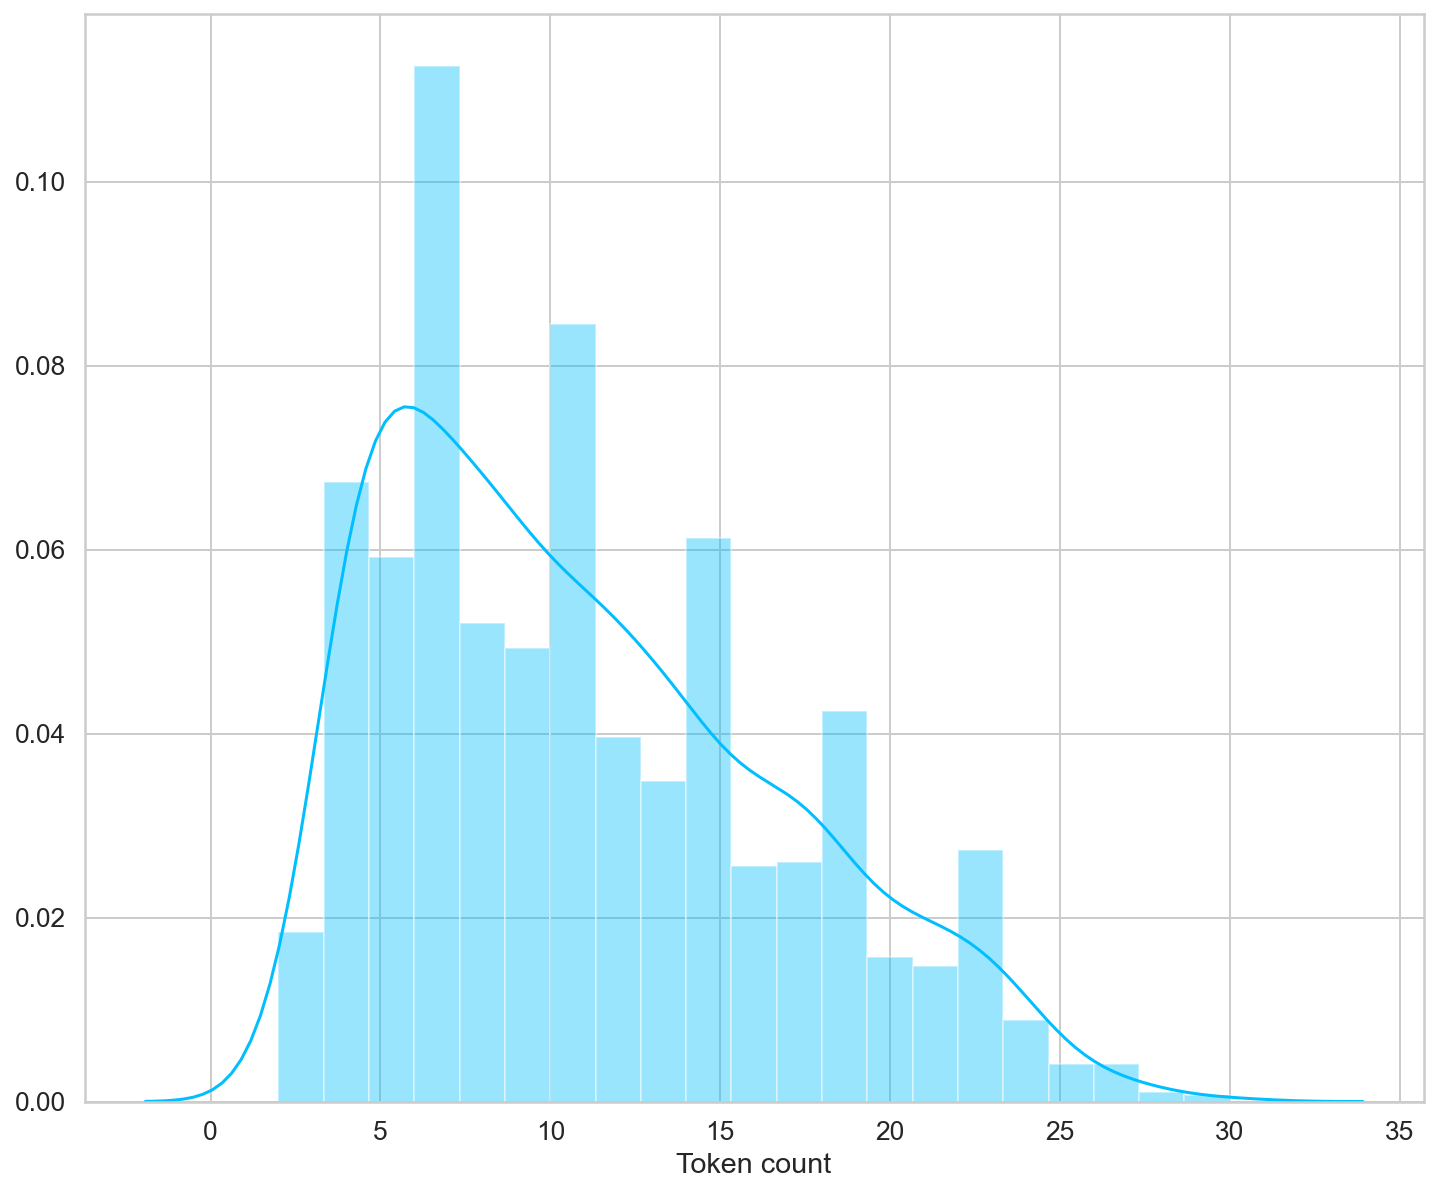

In [379]:
# Plots the token length distribution 
sns.distplot(token_lens)
plt.xlabel('Token count');

In [380]:
import random

# Set MAX_LEN used for padding tokens based on the exploratory analysis result 
MAX_LEN = 35
GLOVE_DIM = 50

def get_embeddings(text_array):
    embeddings = np.zeros((len(text_array), MAX_LEN, GLOVE_DIM))
    for i in range(len(text_array)):
        tokens = text_array[i].split()
        for j in range(min(len(tokens), MAX_LEN)):
            emb = glove_lookup.get(tokens[j].lower())
            if emb is None:
                # print('Embedding not found for: ', tokens[j].lower())
                emb = randvec(n=GLOVE_DIM)
            embeddings[i][j] = emb
    return embeddings

In [381]:
tweets = ['We would like to wish everyone a very Happy New Year and all the best in 2018 htt',
          'ranks 6th in January Idol Group Brand Reputation 1Keep using 2Search GOT 7 on Naver htt']
get_embeddings(tweets)

array([[[ 0.57387 , -0.32729 ,  0.070521, ...,  0.48759 , -0.18439 ,
          0.69939 ],
        [ 0.7619  , -0.29773 ,  0.51396 , ...,  0.43088 , -0.22768 ,
          0.4026  ],
        [ 0.36808 ,  0.20834 , -0.22319 , ..., -0.67236 , -0.39709 ,
          0.25183 ],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[-0.80507 , -0.19595 ,  0.70291 , ..., -0.25731 , -0.34742 ,
         -0.28948 ],
        [-0.6281  ,  0.10793 , -0.20794 , ..., -0.90708 ,  0.091468,
          0.04511 ],
        [ 0.33042 ,  0.24995 , -0.60874 , ..., -0.50703 , -0.027273,
         -0.53285 ],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
   

In [382]:
x_train_emb = get_embeddings(x_train.array)
x_test_emb = get_embeddings(x_test.array)

In [383]:
print(x_train_emb.shape)
print(y_train_category.shape)
print(x_train_emb[0])
print(y_train_category[0])

print(x_test_emb.shape)
print(y_test_category.shape)

(1972, 35, 50)
(1972, 16)
[[ 0.54869  -1.8614   -0.15427  ... -0.32599   0.16674  -1.0102  ]
 [ 0.418     0.24968  -0.41242  ... -0.18411  -0.11514  -0.78581 ]
 [-0.10381  -0.11768  -0.63004  ...  0.51014   0.011653 -0.69331 ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(220, 35, 50)
(220, 16)


### Imbalance Processing: SMOTE

In [384]:
# TODO: expolore imblanced sampling and training
# from imblearn.over_sampling import SMOTE


### Model Development LSTM

#### Model Training

In [385]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense, Dropout, Bidirectional

In [386]:
model = Sequential()
model.add(Bidirectional(LSTM(units=512, return_sequences=True), input_shape=(MAX_LEN, GLOVE_DIM)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=256)))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
# Multi-class classification, y has to be one-hot-encoded use keras.utils.to_categorical.
model.add(Dense(units=len(emoji_class), activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_8 (Bidirection (None, 35, 1024)          2306048   
_________________________________________________________________
dropout_8 (Dropout)          (None, 35, 1024)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 512)               2623488   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

In [387]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])


In [ ]:
EPOCHS = 15
BATCH_SIZE = 64
hist = model.fit(x_train_emb, 
                 y_train_category, 
                 validation_split=0.1, 
                 shuffle=True, 
                 batch_size=BATCH_SIZE, 
                 epochs=EPOCHS)

Epoch 1/15
28/28 [==============================] - 66s 2s/step - loss: 2.7765 - accuracy: 0.0626 - val_loss: 2.7893 - val_accuracy: 0.0354
Epoch 2/15
28/28 [==============================] - 69s 2s/step - loss: 2.7541 - accuracy: 0.0846 - val_loss: 2.7632 - val_accuracy: 0.0758
Epoch 3/15
28/28 [==============================] - 66s 2s/step - loss: 2.7466 - accuracy: 0.0846 - val_loss: 2.7445 - val_accuracy: 0.0960
Epoch 4/15
28/28 [==============================] - 65s 2s/step - loss: 2.7409 - accuracy: 0.0953 - val_loss: 2.7659 - val_accuracy: 0.0808
Epoch 5/15
 1/28 [>.............................] - ETA: 0s - loss: 2.6790 - accuracy: 0.0781

In [ ]:
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

### Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(x_test_emb, y_test_category)
print('    loss:', loss)
print('accuracy:', accuracy)

In [282]:
def get_predictions(model, dataset):
    tweets = dataset['tweet']
    # String of emoji class
    emoji_labels = dataset['label']
    embeddings = get_embeddings(tweets.array)
    preds = model.predict(embeddings)
    # Convert probability matrix to category number with max prodbablity.
    pred_catagories = np.argmax(preds, axis=1)
    pred_probs = preds.max(1)
    # Transform category number to emoji class string.
    pred_labels = label_encoder.inverse_transform(pred_catagories)
    
    return tweets, dataset['label'], dataset['target'], pred_labels, pred_catagories, pred_probs

tweets, emojis, category_num, pred_emojis, pred_category_num, pred_probs = get_predictions(model, df_test)

In [283]:
# precision, recall, f1-score, support.
print(classification_report(category_num, pred_category_num, target_names=list(emoji_class)))

                                precision    recall  f1-score   support

                clapping_hands       0.30      0.36      0.33       282
                          eyes       0.33      0.29      0.31       282
        face_with_rolling_eyes       0.32      0.29      0.30       283
        face_with_tears_of_joy       0.23      0.28      0.25       283
                          fire       0.36      0.40      0.38       283
                  folded_hands       0.51      0.41      0.46       282
                hundred_points       0.38      0.32      0.35       283
            loudly_crying_face       0.28      0.29      0.28       283
                 raising_hands       0.27      0.36      0.31       283
                     red_heart       0.30      0.21      0.25       283
  smiling_face_with_heart-eyes       0.24      0.21      0.22       283
smiling_face_with_smiling_eyes       0.19      0.26      0.22       283
                      sparkles       0.51      0.32      0.40  

In [315]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
#         plt.xticks(tick_marks, target_names, rotation=45)
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

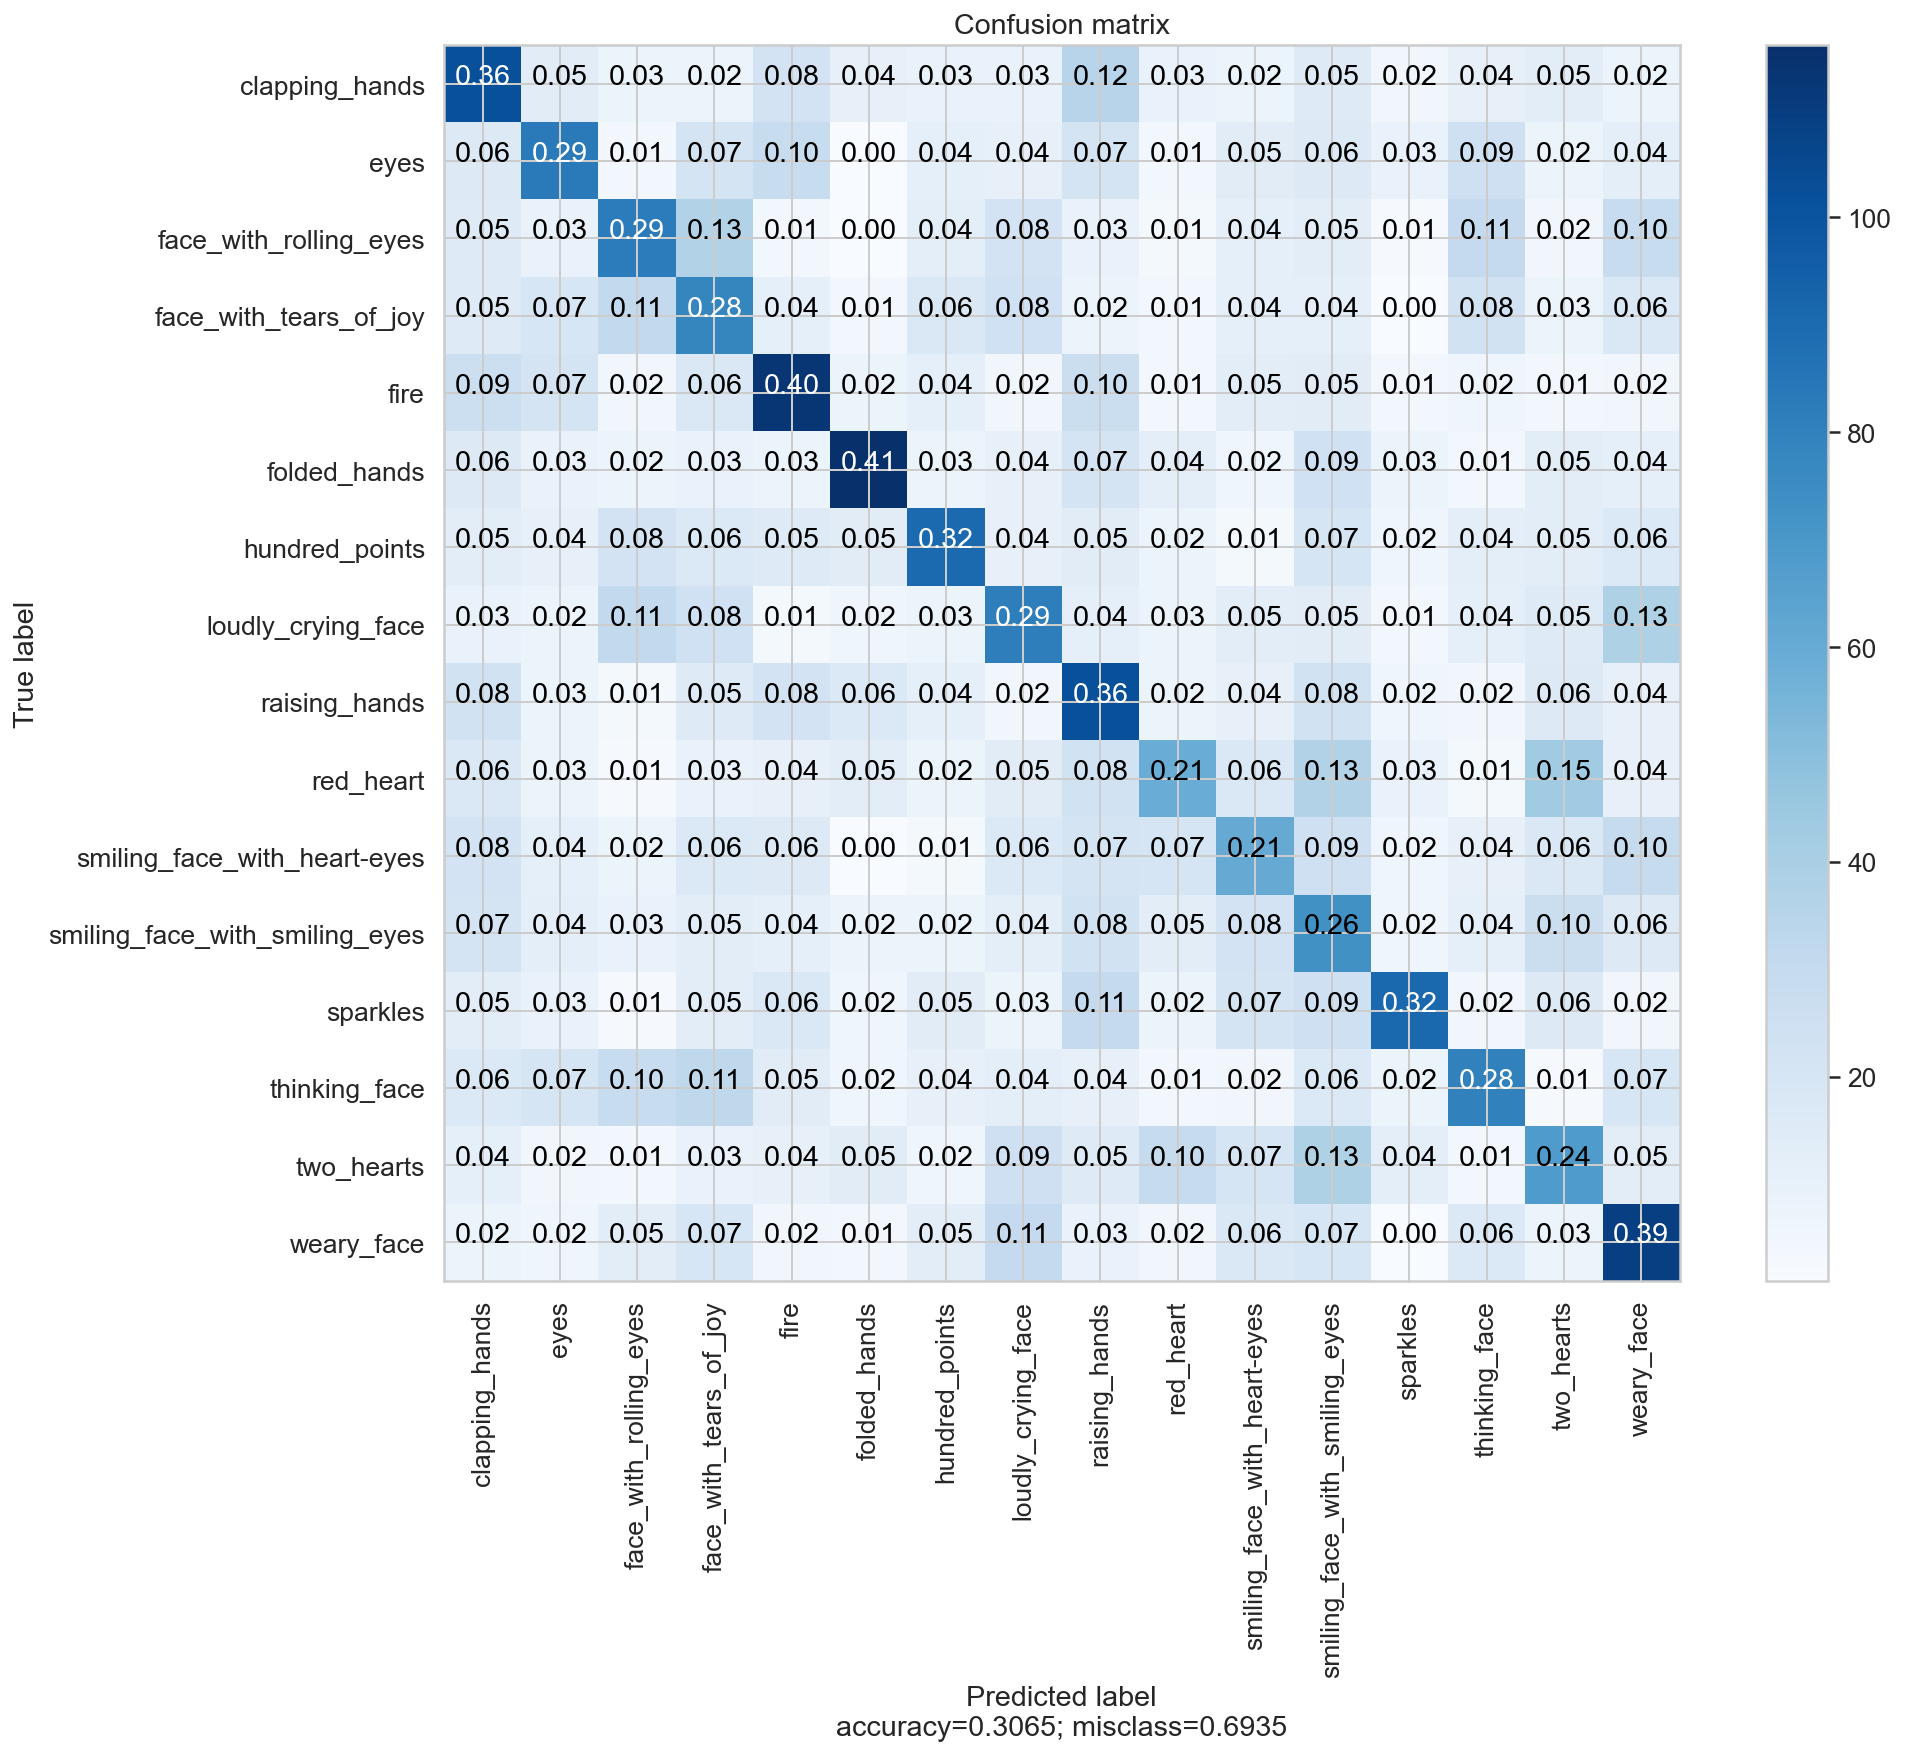

In [316]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

conf_matrix = confusion_matrix(y_true=category_num, y_pred=pred_category_num)

plot_confusion_matrix(conf_matrix, target_names=list(emoji_class))

In [260]:
df_prediction = pd.DataFrame(
    {'tweet_texts': tweets,
     'emojis': emojis,
     'predicted_emojis': pred_emojis,
     'predicted_probability': pred_probs,
    })

In [262]:
df_prediction['emojis'] = [emoji.emojize(':'+ e +':') for e in df_prediction['emojis'].values]
df_prediction['predicted_emojis'] = [emoji.emojize(':'+ e +':') for e in df_prediction['predicted_emojis'].values]

In [263]:
df_prediction.head(20)

,tweet_texts,emojis,predicted_emojis,predicted_probability
id,,,,
7628,They have volleyball on half the court,🙄,😂,0.353831
23450,I was thinking about you today your memories make the sunshine in my life forever Write,🙌,💕,0.424885
5898,Oh right What was I thinking,🙄,😂,0.292069
17955,Playing your most requested on,💯,💯,0.599341
7525,Like thats anything new,🙄,👏,0.711238
18826,My mans taking over the game with this new heat,💯,🔥,0.886289
32341,Some BTS shots from yesterdays shoot I loved the location I love bright colours,😊,💕,0.875005
34075,new year set UR pair Download the original images here You can use them as a wall,✨,✨,0.879820
39331,January was so damn long got me thinking like Is it really February 1st or just January 32nd in disguise,🤔,🤔,0.728245
